In [8]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ifree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ifree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df = pd.read_excel('C:\\Users\\ifree\\Downloads\\Cosas de Francheska\\abinader-Mentions_Report-2023-09-27.xlsx')

In [71]:
print(df.head())

                                                 URL  \
0  https://twitter.com/albertpaulino4/status/1706...   
1  https://twitter.com/JuanHer73031708/status/170...   
2  https://twitter.com/Francis75695617/status/170...   
3  https://twitter.com/YhnRivaxdz/status/17068540...   
4  https://twitter.com/sonia_torres78/status/1706...   

                                                TEXT              DATE  \
0          Habla inglés casi tan bien como  abinader  2023-09-26 22:14   
1  @GrecoHerasme @LeonelFernandez Ese canal no lo...  2023-09-26 22:12   
2  No sólo son ellos donde deja el PRM y aliados ...  2023-09-26 22:12   
3  @MrLuisCossio Será que el libreto se agotó?  A...  2023-09-26 22:11   
4  @AlcaldiadeStgo @AbelMartinezD  Abinader  coje...  2023-09-26 22:09   

           Usuario  
0   albertpaulino4  
1  JuanHer73031708  
2  Francis75695617  
3       YhnRivaxdz  
4   sonia_torres78  


In [72]:
cantidad_registros = df.shape[0]
print("Cantidad de registros:", cantidad_registros)

cantidad_usuarios_distintos = df['Usuario'].nunique()
print("Cantidad de usuarios distintos:", cantidad_usuarios_distintos)

cantidad_tweets_por_usuario = df.groupby('Usuario').size()
promedio_tweets_por_usuario = cantidad_tweets_por_usuario.mean()
print("Cantidad promedio de tweets por usuario:", promedio_tweets_por_usuario)

usuario_con_mas_tweets = cantidad_tweets_por_usuario.idxmax()
cantidad_de_tweets = cantidad_tweets_por_usuario.max()

print(f"Usuario con mayor cantidad de tweets: {usuario_con_mas_tweets} con {cantidad_de_tweets} tweets")

Cantidad de registros: 976
Cantidad de usuarios distintos: 514
Cantidad promedio de tweets por usuario: 1.8988326848249026
Usuario con mayor cantidad de tweets: CDN37 con 22 tweets


In [73]:
df['Sentimiento'] = df['TEXT'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [74]:
df['Polaridad'] = df['Sentimiento'].apply(lambda sent: sent.polarity)
df['Subjetividad'] = df['Sentimiento'].apply(lambda sent: sent.subjectivity)

In [75]:
print(df.head())

                                                 URL  \
0  https://twitter.com/albertpaulino4/status/1706...   
1  https://twitter.com/JuanHer73031708/status/170...   
2  https://twitter.com/Francis75695617/status/170...   
3  https://twitter.com/YhnRivaxdz/status/17068540...   
4  https://twitter.com/sonia_torres78/status/1706...   

                                                TEXT              DATE  \
0          Habla inglés casi tan bien como  abinader  2023-09-26 22:14   
1  @GrecoHerasme @LeonelFernandez Ese canal no lo...  2023-09-26 22:12   
2  No sólo son ellos donde deja el PRM y aliados ...  2023-09-26 22:12   
3  @MrLuisCossio Será que el libreto se agotó?  A...  2023-09-26 22:11   
4  @AlcaldiadeStgo @AbelMartinezD  Abinader  coje...  2023-09-26 22:09   

           Usuario Sentimiento  Polaridad  Subjetividad  
0   albertpaulino4  (0.0, 0.0)        0.0           0.0  
1  JuanHer73031708  (0.0, 0.0)        0.0           0.0  
2  Francis75695617  (0.0, 0.0)        0.0   

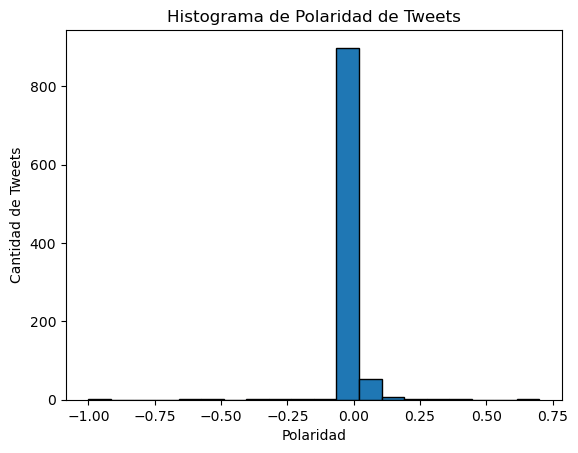

In [76]:
plt.hist(df['Polaridad'], bins=20, edgecolor='k')
plt.title('Histograma de Polaridad de Tweets')
plt.xlabel('Polaridad')
plt.ylabel('Cantidad de Tweets')
plt.show()

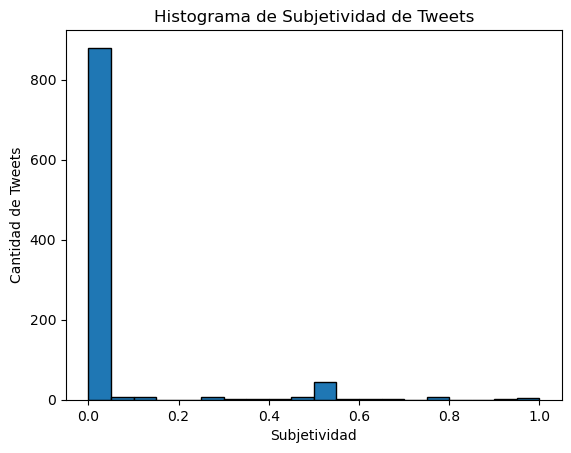

In [77]:
plt.hist(df['Subjetividad'], bins=20, edgecolor='k')
plt.title('Histograma de Subjetividad de Tweets')
plt.xlabel('Subjetividad')
plt.ylabel('Cantidad de Tweets')
plt.show()

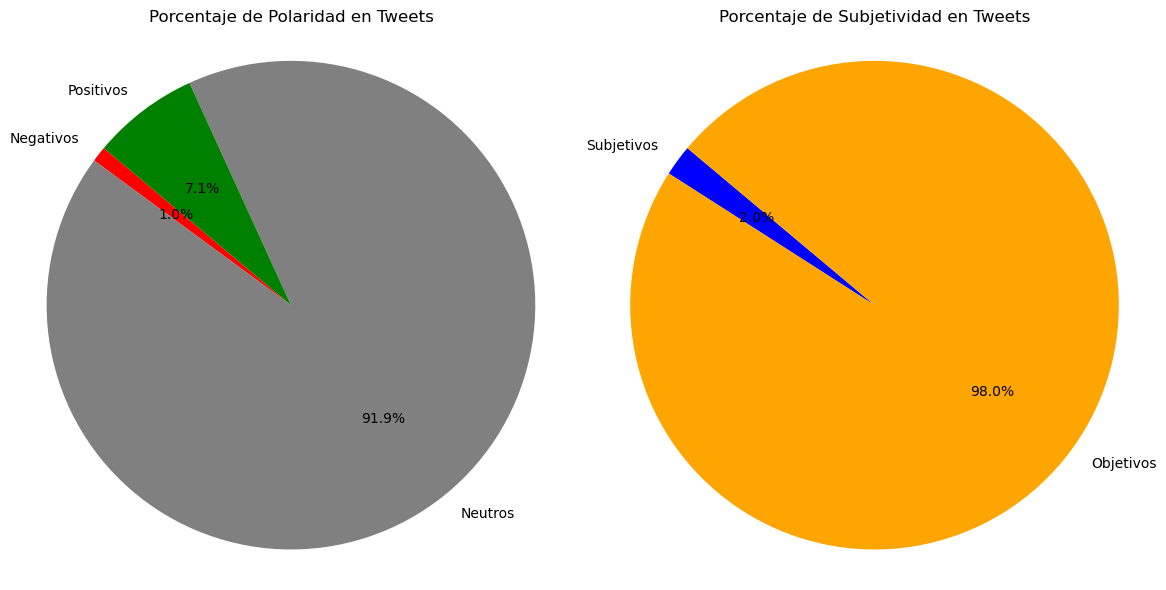

In [78]:
num_tweets = len(df)
num_negativos = len(df[df['Polaridad'] < 0])
num_neutros = len(df[df['Polaridad'] == 0])
num_positivos = len(df[df['Polaridad'] > 0])

valores = [num_negativos, num_neutros, num_positivos]
etiquetas = ['Negativos', 'Neutros', 'Positivos']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['red', 'gray', 'green'])
plt.title('Porcentaje de Polaridad en Tweets')
plt.axis('equal') 

num_subjetivos = len(df[df['Subjetividad'] > 0.5])
num_objetivos = len(df[df['Subjetividad'] <= 0.5])

valores_subjetividad = [num_subjetivos, num_objetivos]
etiquetas_subjetividad = ['Subjetivos', 'Objetivos']

plt.subplot(1, 2, 2)
plt.pie(valores_subjetividad, labels=etiquetas_subjetividad, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Porcentaje de Subjetividad en Tweets')
plt.axis('equal')  

plt.tight_layout()
plt.show()


In [10]:
analyzer = SentimentIntensityAnalyzer()

def calcular_sentimiento(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    return sentiment

df['Sentimiento_vader'] = df['TEXT'].apply(calcular_sentimiento)

print(df[['TEXT', 'Sentimiento_vader']])

                                                  TEXT  \
0            Habla inglés casi tan bien como  abinader   
1    @GrecoHerasme @LeonelFernandez Ese canal no lo...   
2    No sólo son ellos donde deja el PRM y aliados ...   
3    @MrLuisCossio Será que el libreto se agotó?  A...   
4    @AlcaldiadeStgo @AbelMartinezD  Abinader  coje...   
..                                                 ...   
971  🗞 |#NacionalDL| Ministro haitiano de Agricultu...   
972  El presidente Luis  Abinader  dispuso el trasl...   
973  Ministro haitiano de Agricultura, Bredy Charlo...   
974  El Ministro haitiano de Agricultura estaría da...   
975  Pdte Abinader Hay centenares de estudiantes fu...   

                                     Sentimiento_vader  
0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1    {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...  
2    {'neg': 0.093, 'neu': 0.907, 'pos': 0.0, 'comp...  
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4    {'neg': 0.239

In [11]:
num_tweets = len(df)
num_negativos = len(df[df['Sentimiento_vader'].apply(lambda x: x['compound']) < 0])
num_neutros = len(df[df['Sentimiento_vader'].apply(lambda x: x['compound']) == 0])
num_positivos = len(df[df['Sentimiento_vader'].apply(lambda x: x['compound']) > 0])

valores = [num_negativos, num_neutros, num_positivos]
etiquetas = ['Negativos', 'Neutros', 'Positivos']

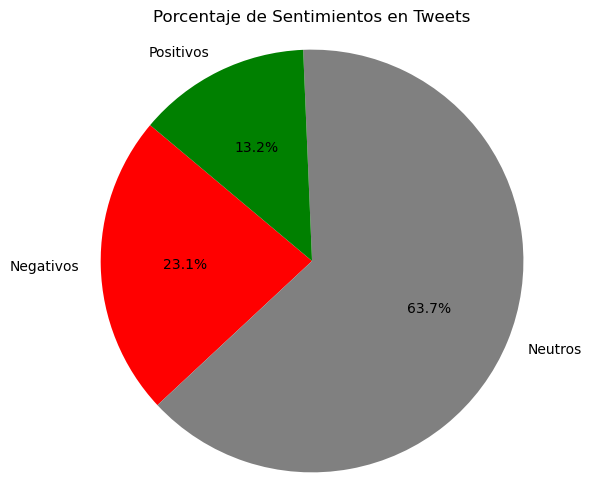

In [12]:
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=['red', 'gray', 'green'])
plt.title('Porcentaje de Sentimientos en Tweets')
plt.axis('equal')

plt.show()

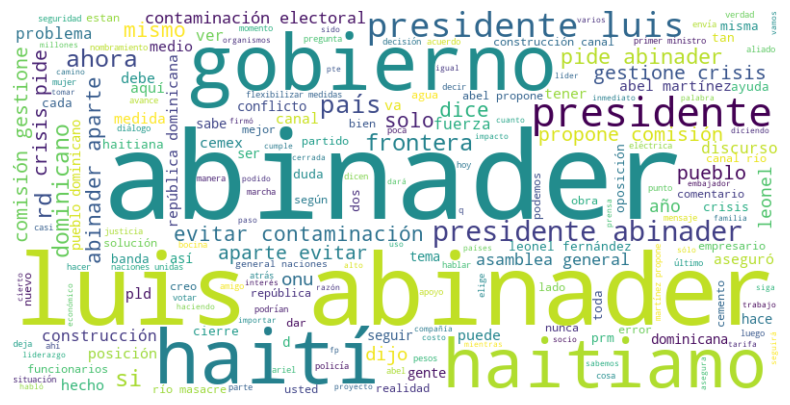

In [17]:
comentarios_negativos = df[df['Sentimiento_vader'].apply(lambda x: x['compound'] < 0)]['TEXT']


stop_words = set(stopwords.words('spanish'))
palabras_negativas = []

for comentario in comentarios_negativos:
    words = comentario.split()  
    for word in words:
     
        if word.isalnum() and word.lower() not in stop_words:
            palabras_negativas.append(word.lower())


texto_palabras_negativas = ' '.join(palabras_negativas)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_palabras_negativas)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
